# Analyze post-test questionnaires

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os.path as op
import glob

# for plotting
sns.set(style='whitegrid', context='poster')
%matplotlib inline

# R for stats
# %load_ext rpy2.ipython
# %R require(lme4)
# %R require(lmerTest)

/Users/sgagnon/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/Users/sgagnon/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
dirs = dict()
dirs['basedir'] = op.join(op.expanduser('~'), 'Experiments/SST')
dirs['datadir'] = op.join(dirs['basedir'], 'data')
dirs['analydir'] = op.join(dirs['basedir'], 'analysis')
dirs['subj_info_file'] = op.join(dirs['datadir'], 'subj_info.csv')

In [9]:
subj_info = pd.read_csv(dirs['subj_info_file'])
subj_info = subj_info[pd.isnull(subj_info.remove)]
subj_info[['subid']] = subj_info.subid.astype(str)

subj_info

,subid,group,remove
1,2,control,NaN
2,3,control,NaN
3,4,control,NaN
4,5,control,NaN
5,6,control,NaN
6,7,control,NaN
7,9,control,NaN
8,10,control,NaN
9,11,control,NaN


In [11]:
dq = pd.DataFrame() 
questionnaires = ['QSR', 'QSR2']

for subid in subj_info.subid:
    print subid

    for questionnaire in questionnaires:
        # add test file
        qfile = glob.glob(op.join(dirs['datadir'], 'Quest', 'SST_' + 
                                  subid + '_post1_*_' + questionnaire + '.xls'))[0]
        d2 = pd.read_csv(qfile, sep='\t')
        d2['subid'] = subid
        dq = dq.append(d2, ignore_index=True)
        

2
3
4
5
6
7
9
10
11


In [12]:
dq = dq[['subid', 'questionLabel', 'subScaleName', 'adjustedRating']]
dq.head()

,subid,questionLabel,subScaleName,adjustedRating
0,2,Q1,generalSOD,4
1,2,Q2,generalSOD,4
2,2,Q3a,route,4
3,2,Q3b,landmark,4
4,2,Q3c,survey,4


/Users/sgagnon/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


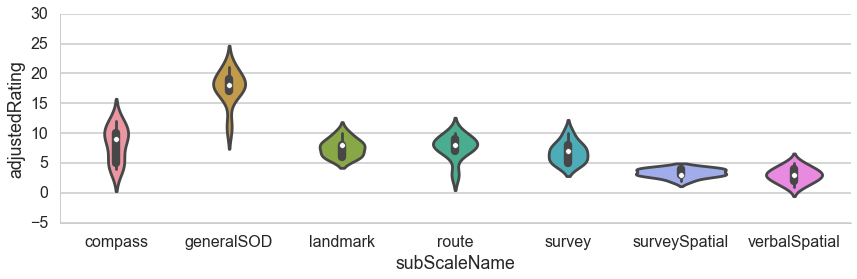

In [13]:
data = dq.groupby(['subid', 'subScaleName']).sum().reset_index()
sns.factorplot(x='subScaleName', y='adjustedRating', aspect=3,
               kind='violin', 
               units='subid', ci=68, data=data)

## Compute survey - landmark score

In [14]:
data = dq.groupby(['subid', 'subScaleName']).sum().reset_index()
data = data.pivot(index='subid', columns='subScaleName', values='adjustedRating').reset_index()
data

subScaleName,subid,compass,generalSOD,landmark,route,survey,surveySpatial,verbalSpatial
0,10,12,21,6,7,10,3,3
1,11,4,11,8,8,5,4,3
2,2,9,18,8,8,8,4,2
3,3,11,19,6,3,8,3,4
4,4,5,18,8,10,6,3,2
5,5,8,18,10,7,5,3,1
6,6,10,17,9,9,7,2,5
7,7,5,20,6,9,7,4,3
8,9,10,17,7,8,5,4,4


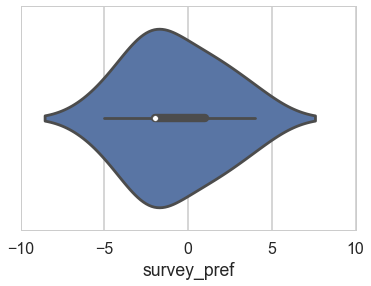

In [15]:
data['survey_pref'] = data.survey - data.landmark
sns.violinplot(data.survey_pref)

In [16]:
data

subScaleName,subid,compass,generalSOD,landmark,route,survey,surveySpatial,verbalSpatial,survey_pref
0,10,12,21,6,7,10,3,3,4
1,11,4,11,8,8,5,4,3,-3
2,2,9,18,8,8,8,4,2,0
3,3,11,19,6,3,8,3,4,2
4,4,5,18,8,10,6,3,2,-2
5,5,8,18,10,7,5,3,1,-5
6,6,10,17,9,9,7,2,5,-2
7,7,5,20,6,9,7,4,3,1
8,9,10,17,7,8,5,4,4,-2


In [17]:
file_tosave = op.join(dirs['datadir'], 'Quest/Questionnaires_group.csv')
data.to_csv(file_tosave)